# Guía 7 Métodos Numéricos 2021

In [1]:
using Plots

## Problema 1

Escriba funciones que permitan realizar un paso de integración de la ecuación,

$$
\frac{dy}{dt} = f(t,y,p),\;\;\;\;\;\; a\leq t \leq b,\;\;\;\;\; y(a) = \alpha
$$

de una función arbitraria $f(t,x,p)$ de acuerdo a los métodos de Euler, y Runge Kutta de 2° orden (RK2) y Runge Kutta de 4° orden (RK4). 
Las funciones deben admitir como variables: $f(t,x,p)$, $x_0$ (el valor inicial), $t_0$ y $h$ (el paso de integración), el campo $p$ es para permitir parámetros en la función. 
Cada función debe retornar el valor de la variable luego del paso de integración, es decir la aproximación a $x(t + h)$.

Utilizando estas funciones escriba otra función que permita hacer, tomando como variable cualquiera de los métodos, la integración de una función genérica en un intervalo $[a,b]$ arbitrario. Esta función deberá admitir como variables, además de las anteriores, la función de un paso de cada método, y el intervalo de integración.
La función debe retornar dos vectores, uno con los valores $t_i = t_0 + i*h$ y otro con los valores aproximados de $x_i \approx x(t_i)$.

**Ayuda:** Dejamos como ejemplo la implementación del método de Euler.

In [2]:
"""
    Euler(f,y0,t0,h,p)

Hace un paso del método de Euler explícito: 
    f = función que nos da la tangente como en (y,t,p)
    y0 = y inicial
    t0 = t inicial
    h = dt
    p = parametros opcionales.

# Examples
```julia-repl
julia> 
function f(y,t,p)
    return -p[1]*y + sin(2π*t) + p[2]
end
h= 0.1
Euler(f,1,0,h,[1,2])
1.1
```
"""
function Euler(f::Function,y0,t0,h,p)
    return y0 + h*f(y0,t0,p)
end
function Euler(f::Function,y0,t0,h)
    return y0 + h*f(y0,t0) 
end

Euler (generic function with 2 methods)

In [3]:
# Aca hago Runge Kutta de segudo orden
# con dos metodos tambien, para poder agregar parametros.

function RK2(f::Function,y0,t0,h)
    k = h*f(y0,t0)
    return y0 + h*f(y0+(k/2),t0+(h/2))
end

function RK2(f::Function,
    y0,
    t0,
    h,
    p)
    k = h*f(y0,t0,p)
    return y0 + h*f(y0+(k/2),t0+(h/2),p)
end

RK2 (generic function with 2 methods)

In [4]:
# Aca hago Runge Kutta de cuarto orden
# con dos metodos tambien, para poder agregar parametros.

function RK4(f::Function,y0,t0,h::Float64,
    p)
    k1 = h*f(y0,t0,p)
    k2 = h*f(y0+k1/2,t0+h/2,p)
    k3 = h*f(y0+k2/2,t0+h/2,p)
    k4 = h*f(y0+k3,t0+h,p)
    return y0+(k1+2*k2+2*k3+k4)/6
end
function RK4(f::Function,
    y0,
    t0,
    h
    )
    k1 = h*f(y0,t0)
    k2 = h*f(y0+k1/2,t0+h/2)
    k3 = h*f(y0+k2/2,t0+h/2)
    k4 = h*f(y0+k3,t0+h)
    return y0+(k1+2*k2+2*k3+k4)/6
end

RK4 (generic function with 2 methods)

In [5]:
"""
    ODEproblem(Method,f,y0,intervalo,N,p) 

Hace una evolución de una ecuación ordindaria dada por f(y,t) usando Method.
    Method: algún método de integración, por ejemplo Euler(f,y0,t0,h)
    f = función que nos da la tangente como en (y,t)
    y0 = y inicial
    intervalo = (t_inicial, t_final)
    N = número de pasos
    p = parámetros opcionales

# Examples
```julia-repl
julia> 
function f(y,t,p)
    return -p[1]*y + sin(2π*t) + p[2]
end
y0 = 0.0
intervalo = (0,1)
t,y = ODEproblem(Euler,f,y0,intervalo,101,[1,2])
```
"""
function ODEproblem(Method,f,y0,intervalo,N,p)
    a,b = intervalo
    h = (b-a)/(N-1)
    y = zeros(N)
    t = zeros(N)
    y[1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[i] = Method(f,y[i-1],t[i-1],h,p)
    end
    return (t[:] ,y[:])
end

function ODEproblem(Method,f,y0,intervalo,N)
    a,b = intervalo
    h = (b-a)/(N-1)
    y = zeros(N)
    t = zeros(N)
    y[1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[i] = Method(f,y[i-1],t[i-1],h)
    end
    return (t[:] ,y[:])
end

ODEproblem (generic function with 2 methods)

## Problema 2

Utilizando las funciones del **Problema 1** resuelva con los tres métodos dados en el teórico (Euler, RK2 y RK4) el siguiente problema de valores iniciales:
$$
\frac{dy}{dt} = -y+\sin(2\pi t), \;\;\;\;\;\; 0 \le t \le 1\; , 
\;\;\;\;\; y(0) = 1.0
$$
en el intervalo $0 \le t \le 1$ con un paso de integración $h=0.1$. 

Grafique tanto la solución obtenida y compare con la exacta: 

$$
x_e(t)=\Bigl(1+\frac{2\pi}{1+4\pi^2}\Bigr)e^{-t}+\frac{\sin(2\pi t)-2\pi
    \cos(2\pi t)}{1+4\pi^2},
$$

Grafique el error global, $\epsilon(t) = |y(t)-y_e(t)|$

In [37]:
h(y,t,p)= -y + sin(2*π*t)
int = (0,1)
n = 100
p=2*π
euler20 = ODEproblem(Euler,h,1.0,int,n,p)
RK2_20 = ODEproblem(RK2,h,1.0,int,n,p)
RK4_20 = ODEproblem(RK4,h,1.0,int,n,p);

In [38]:
using Plots

In [39]:
solucion(t) = (1+(2*π)/(1+4*π^2))*exp(-t)+(sin(2*π*t)-2*π*cos(2*π*t))/(1+4*π^2)

solucion (generic function with 1 method)

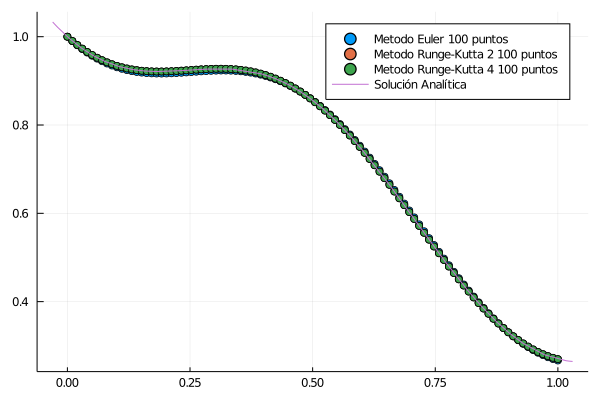

In [40]:
scatter(euler20, label="Metodo Euler $n puntos",
   # xlims = (0.00,0.25),
   # legend=:outertopright
)
scatter!(RK2_20, label="Metodo Runge-Kutta 2 $n puntos")
scatter!(RK4_20, label="Metodo Runge-Kutta 4 $n puntos")
plot!(solucion, label="Solución Analítica")

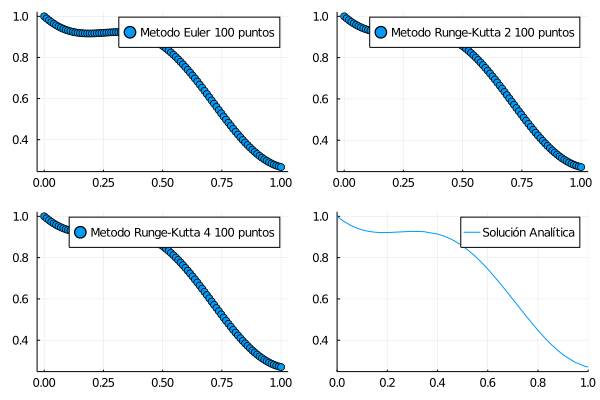

In [41]:
p1 = scatter(euler20, label="Metodo Euler $n puntos")
p2 = scatter(RK2_20, label="Metodo Runge-Kutta 2 $n puntos")
p3 = scatter(RK4_20, label="Metodo Runge-Kutta 4 $n puntos")
p4 = plot(solucion, label="Solución Analítica", xlims=(0.0,1.0))
plot(p1, p2, p3, p4, layout = 4)

# Problema 3
Considere el problema de valor inicial:
$$
\frac{dy}{dx} = \sin{(y)},\;\;\;\;\;\; 0\le t\le 20.0, \;\;\;\;\; y(0)=\alpha
$$
Resuélvalo para los siguientes valores iniciales $\alpha_1=0.5$, $\alpha_2=2.0$, $\alpha_3= \pi$, $\alpha_4=3.6$ $\alpha_5=5.5$ y $\alpha_6=2\pi$, en todos los casos con $h=0.1$.
Para cada valor inicial genere un archivo de salida como el indicado en el problema 1 (solo para RK4). 
Luego grafique simultáneamente las seis curvas aproximadas a las soluciones de los seis problemas de valores iniciales (no olvide hacer un gráfico de calidad, completo). 
Analice.

In [42]:
#α = 0.5
#α = 2.0
#α = π
α = 3.6
#α = 5.5
#α = 2*π
dy(y,t,p) = sin(y)
y0 = α
int = (0.0,20.0)
n = 200
p=1
eulerP3 = ODEproblem(Euler,dy,α,int,n,p)
RK2_P3 = ODEproblem(RK2,dy,α,int,n,p)
RK4_P3 = ODEproblem(RK4,dy,α,int,n,p);

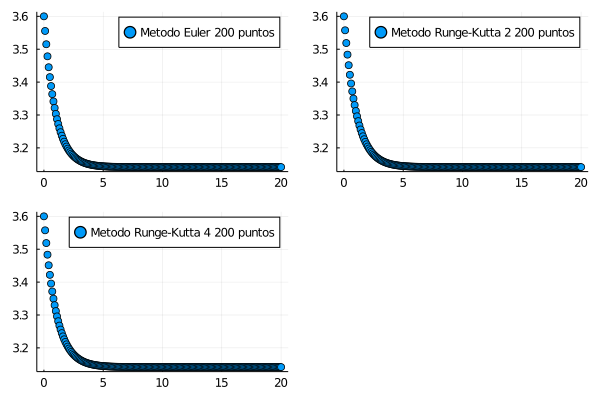

In [43]:
p1 = scatter(eulerP3, label="Metodo Euler $n puntos")
p2 = scatter(RK2_P3, label="Metodo Runge-Kutta 2 $n puntos")
p3 = scatter(RK4_P3, label="Metodo Runge-Kutta 4 $n puntos")
#p4 = plot(solucion, label="Solución Analítica", xlims=(0.0,20.0))
plot(p1, 
    p2, 
    p3, 
    #p4, 
    layout = 3)

In [13]:
using Plots

@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end
n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)
@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5;

┌ Info: Saved animation to 
│   fn = /home/andresmateo/Documentos/Facu/Metodos Numericos/Guias Jupyter/tmp.gif
└ @ Plots /home/andresmateo/.julia/packages/Plots/z5Msu/src/animation.jl:104


# Problema 4
**Método de Runge-Kutta de orden 4**

Muestre que la elección dada en el teórico para los pesos $\vec{b}$, los nodos $\vec{c}$ y la matriz $A$ para el método RK4:
\begin{eqnarray}
\vec{b}&=&(1/6,1/3,1/3,1/6) \\
\vec{c}&=&(0,1/2,1/2,1) \\
a_{2,1}&=&1/2 \\
a_{3,2}&=&1/2 \\
a_{4,3}&=&1
\end{eqnarray}
conduce a las ecuaciones RK4 "clásicas" dadas en clase.

# Problema 5
Considere el problema de valores iniciales para la ecuación de la dinámica de un péndulo simple de longitud $l$
$$
\frac{d^2\theta}{d t^2} = - \frac{g}{l} \sin{(\theta)}, \quad
\theta(0)=\theta_0, \quad \frac{d\theta}{d t}(0)= \dot{\theta}_0,
$$
donde $g$ es la acelaración de la gravedad. Definiendo  $u= \dot{\theta}$ esta ecuación de segundo orden se puede escribir como un sistema de dos ecuaciones de primer orden
\begin{eqnarray}
\frac{d\theta}{d t} &=& u \hspace{5cm} (1)\\
\frac{d u}{d t} &=& - \frac{g}{l} \sin{(\theta)}
\end{eqnarray}
mientras que las condiciones iniciales transformadas quedan $(u(0),\theta(0))=(\dot{\theta}_0,\theta_0)$.

Resuelva este sistema de dos ecuaciones diferenciales ordinarias acopladas con el método RK4 para $g=10 m/s^2$ y $l=1 m$. 

1. Grafique $\theta$ vs. $t,$ para $0\le t\le 10,$ con las siguientes condiciones iniciales: a) $u(0)=0$ y $\theta(0)=0.5$ y b) $u(0)=0$ y $\theta(0)=0.25$.

2. Calcule la energía del sistema en cada paso. Para las condiciones del inciso anterior grafique la energía vs. $t$. Analice la conservación para distintos valores de $h$.

3. Para las condiciones iniciales $\theta(0)=\theta_0,$ y $u(0)=0$, las ecuaciones de movimiento del péndulo se pueden aproximar por las siguientes:
\begin{eqnarray}
\frac{d\theta}{d t} &=& u \hspace{5cm} (2)\\
\frac{d u}{d t} &=& - \frac{g}{l} \theta
\end{eqnarray}
cuando $\theta_0\ll 1$.
Las ecuaciones (2) admiten solución exacta $\theta(t) = \theta_0 \cos(\sqrt{10}t)$.
Compare la solución exacta con aproximaciones numéricas $\theta_{\mathrm{num}}(t)$ de las ecuaciones (1) y (2)  obtenidas con el método RK4. 
Para ello, grafique la diferencia $\theta_{\mathrm{num}}(t)-\theta_0 \cos(\sqrt{10}t)$ en $0\le t\le 10$ para los casos $\theta_0=1$ y $\theta_0=10^{-2}$. 

**Ayuda:** Note que $y(t)\in \mathbb{R}^2$ y $f(t,y)\in \mathbb{R}^2$ donde $y=(y_1,y_2)=(\theta,u)$ y $f(t,y)=(f_1(t,y),f_2(t,y))$ con $f_1(t,y)=y_2$ y $f_2(t,y)=-\frac{g}{l}\sin(y_1)$.

In [14]:
# Tengo que hacer un programa para que en cada paso resuelva ambas ecuaciones con Runge Kutta 4
# Puedo utilizar el paso ya definido RK4, pero tengo que expandir la funcion para tuplas.
function ODEproblemMulti(Method::Function,
        f::Function,
        y0,
        intervalo,
        N::Int64
        )
    a,b = intervalo
    h = (b-a)/(N-1)
    U = length(y0)
    y = zeros(U,N)
    t = zeros(N)
    y[:,1] = y0
    t[1] = a
    for i in 2:N
        t[i] = t[i-1] + h
        y[:,i] = Method(f,y[:,i-1],t[i-1],h)
    end
    return (t[:] ,y[:,:])
end


ODEproblemMulti (generic function with 1 method)

In [15]:
g = 10.0
l = 1.0
f(y,t)=[y[2],-(g/l)*sin(y[1])] 
u_0 = 0.0
θ_0 = 0.5
y0 = [u_0,θ_0]
intervalo = (0.0,10.0)
n = 1000
t,sol = ODEproblemMulti(RK4,f,y0,intervalo,n)
length(sol[2])
#println(sol)

1

In [16]:
[1,2]

2-element Array{Int64,1}:
 1
 2

In [17]:
using Plots

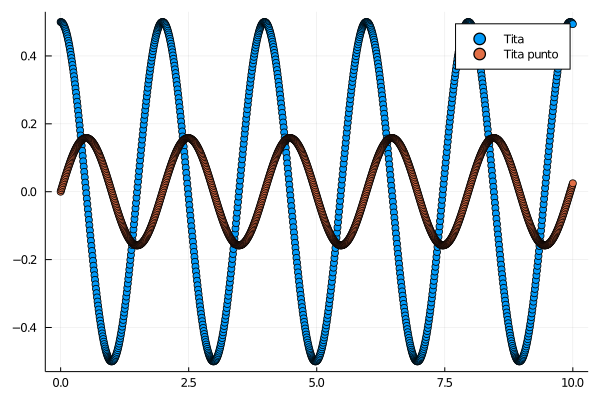

In [18]:
scatter(t,sol[2,:], label="Tita")
scatter!(t,sol[1,:], label="Tita punto")

In [48]:
g = 10.0
l = 1.0
gg(y,t)=[y[2],-(g/l)*y[1]]
u_0 = 0.0
θ_0 = 0.5
y0 = [u_0,θ_0]
intervalo = (0.0,10.0)
n = 100
t,soles = ODEproblemMulti(RK4,gg,y0,intervalo,n);

In [49]:
exacta(t) = θ_0 * cos(sqrt(10)*t)

exacta (generic function with 1 method)

In [50]:
scatter(t,soles[1],soles[2])
plot!(exacta)

LoadError: [91mCannot convert Float64 to series data for plotting[39m

# Problemas Complementarios

## Problema C.1
Use el método del disparo para resolver los siguientes problemas de 
frontera con una tolerancia de $10^{-5}$. Se da un valor tentativo inicial de $h$ 
y la solución exacta  para comparación.
 
1. $1\leq t\leq 2$, comience con $h=0.5$
$$
\ddot{x}\,=\,-(\dot{x})^2 \,,\;\;\;x(1)=0\;,\;\;x(2)=\ln{(2)} \,.
$$
Solución exacta $x=\ln{(t})$.

2. $-1\leq t\leq 0$, comience con $h=0.25$
$$
\ddot{x}\,=\,2 x^3\,,\;\;\;x(-1)=\frac{1}{2}\;,\;\;x(0)=\frac{1}{3} \,.
$$
Solución exacta $x=1/(t+3)$.

3. $1\leq t\leq 2$, comience con $h=0.05$
$$
\ddot{x}\,=\,\frac{(t\,\dot{x} )^2\,-9 x^2+4 t^6}{t^5},\;\;\;x(1)=0\;,\;\;x(2)=\ln{(256)} \,.
$$
Solución exacta $x=t^3\,\ln{(t})$.

**Ayuda:** Utilice el método de la bisección para encontrar la raíz de $F$.

## Problema C.2
Considere la siguiente ecuación diferencial
$$
y^{\prime \prime} = \frac{1}{8} \left( 32 + 2 x^3 - y y' \right)    \qquad \qquad \mbox{para }
1 \le x \le 3
$$
1. Utilice el método RK4 en el intervalo $1 \le x\le 3$ para resolver esta ecuación con las condiciones iniciales $y(1) = 17$, $y'(1) = 0$.
Encuentre, además $y'(3)$.

2. Repita el inciso anterior, pero con las condiciones iniciales $y(1) = 17$, $y'(1) = -40$.

3. Resuelva la misma ecuación diferencial con las condiciones de borde $y(1) = 17$, $y' (3) = 0$ en $N=400$ puntos equiespaciados de $x\in [1,3]$ usando el método de disparo. Para ello, combine el método de la bisección de tolerancia $10^{-10}$ con la información de los incisos anteriores. Grafique la solución $y$ y su derivada $y'$.

## Problema C.3
La llamada **ecuación logística**
$$
\frac{dN}{dt}= r\,N \left(1-\frac{N}{K}\right)
$$
describe el crecimiento autolimitado de una población dada (suponiendo que no
interactúa con otras especies y que tiene fuentes limitadas de alimentos). Fue
propuesta por Verhulst en 1838 y permite describir al menos cualitativamente
varios fenómenos poblacionales observados en la naturaleza. En esta ecuación
$N(t)$ es el número de individuos de la colonia al tiempo $t$ y $K$ es una
constante positiva.

Una solución $N^*$ se dice estacionaria si se satisface que $dN^*/dt=0$, y por
ende no cambia en el tiempo. Para esta ecuación es fácil verificar que
sólo existen dos soluciones estacionarias: $N_1^*=0$ y $N_2^*=K$.

Determine cuál de las dos soluciones estacionarias es estable y cuál inestable
resolviendo numéricamente la ecuación diferencial con el método
Runge-Kutta de cuarto orden para $r=2$, $K=100$, en el intervalo $0\le t \le 50$
con $h=0.1$ y considerando cinco condiciones iniciales diferentes: a) $N(0)= 0$,
b) $N(0)=2$, c) $N(0)=50$, d) $N(0)= 120$ y d) $N(0)=200$.  Grafique
simultáneamente las cinco soluciones $t$ vs.  $N(t)$ en el intevalo $0\le t\le
50$ en un gráfico completo.

In [22]:
# Quiero ver primero la cantidad de puntos que necesito para que sea h = 0.1
50/0.1

500.0

In [23]:
N_prima(N,t) = r*N*(1-N/K)
r = 2.0
K = 100.0
N_0 = [0.0,2.0,50.0,120.0,200.0]
n = 500
intervalo = (1.0,50.0)
Solution = Array{Any,2}(undef,1,5)
t = Array{Any,1}
for i ∈ 1:5
   t , Solution[i] = ODEproblem(RK4,N_prima,N_0[i],intervalo,n)
end
Solution

1×5 Array{Any,2}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  …  [200.0, 169.741, 150.969, 138.393, 129.526, 123.048, 118.191, 114.478, 111.597, 109.336  …  100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

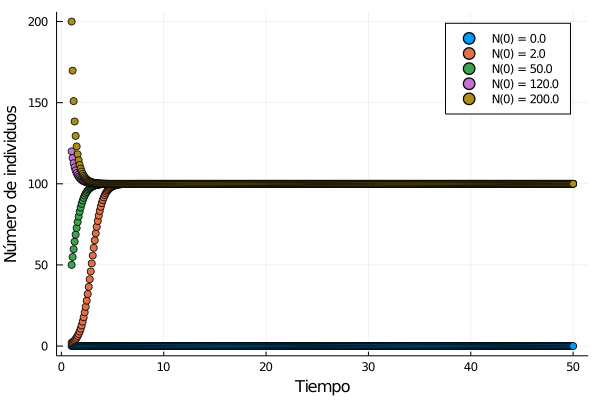

In [24]:
scatter(t,Solution[1], label = "N(0) = $(N_0[1])", xlabel = "Tiempo", ylabel = "Número de individuos")
scatter!(t,Solution[2], label = "N(0) = $(N_0[2])")
scatter!(t,Solution[3], label = "N(0) = $(N_0[3])")
scatter!(t,Solution[4], label = "N(0) = $(N_0[4])")
scatter!(t,Solution[5], label = "N(0) = $(N_0[5])")

## Problema C.3
   
El objeto de este problema es familiarizarse con el uso de una librería para resolver un sistema de ecuaciones en derivadas parciales. 
    Para ello les pedimos que reproduzca en su notebook el **ejemplo 2** de esta página: https://diffeq.sciml.ai/stable/tutorials/ode_example/
    Se trata del atractor de Lorenz, un sistema que excibe caos y que es una simplificación *extrema* de un problema de climatología. 
    Luego de implementarlo, juegue cambiando las condiciones iniciales y/o parámetros. Cambie los métodos de integración. Esta librería tiene decenas de distintos métodos.
    
**Nota:** Al comienzo tiene que poner: `using Plots, OrdinaryDiffEq`

In [25]:
# lo voy a hacer en otro notebook para no sobrecargar este